# Multi-class classification


In [9]:
import os
import pickle
import numpy as np 
import pandas as pd

from keras.utils.np_utils import to_categorical


DATA_PATH = "../data/raw"


In [10]:
df = pd.read_csv(os.path.join(DATA_PATH, "mul_cls.csv"))
df["label"] = df["label"].astype("category")


In [11]:
# Get the numerical ids of column label
numerical_ids = df.label.cat.codes

# Print initial shape
print(numerical_ids.shape)

# One-hot encode the indexes
Y = to_categorical(numerical_ids)

# Check the new shape of the variable
print(Y.shape)

# Print the first 5 rows
print(Y[:5])


(1672,)
(1672, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

news_dataset = pd.read_csv(os.path.join(DATA_PATH, "news_dataset.csv"))


In [13]:
# Create and fit tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_dataset.data)

# Prepare the data
prep_data = tokenizer.texts_to_sequences(news_dataset.data)
prep_data = pad_sequences(prep_data, maxlen=200)

# Prepare the labels
prep_labels = to_categorical(news_dataset.target)

# Print the shapes
print(prep_data.shape)
print(prep_labels.shape)


(5000, 200)
(5000, 20)


## Transfer learning


In [14]:
history_emb = {
    "acc": [0.429523141404188, 0.6567321179792557],
    "loss": [1.3484232113037002, 0.9192634542560176],
    "val_acc": [0.6172904589330767, 0.6547179761282318],
    "val_loss": [0.9943465825187953, 0.8769925933922349],
}
history_no_emb = {
    "acc": [0.3011921458625526, 0.641304347658893],
    "loss": [1.5740309341759702, 0.9943260273792968],
    "val_acc": [0.4169741699302203, 0.6910911970032977],
    "val_loss": [1.4070982545315749, 0.8381293654504675],
}


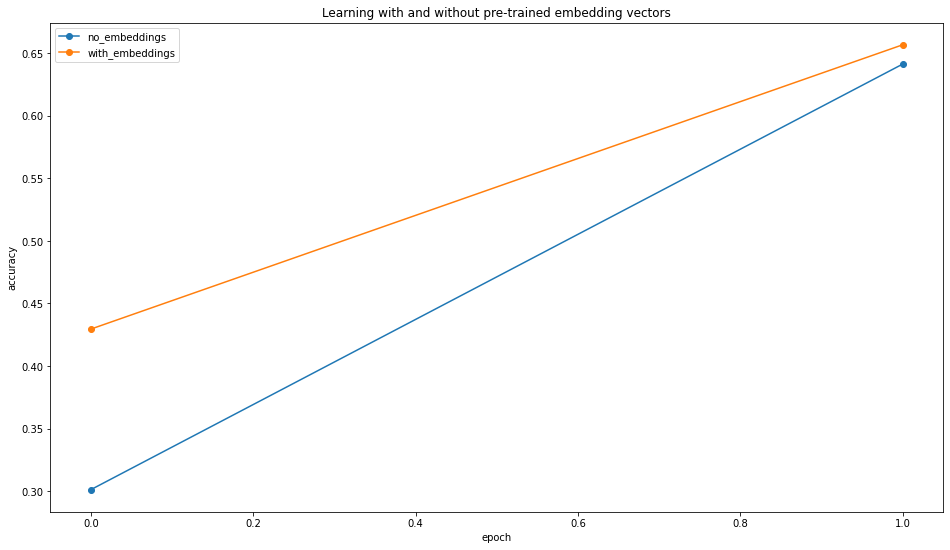

In [15]:
# Import plotting package
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams["figure.figsize"] = (16, 9)

# Insert lists of accuracy obtained on the validation set
plt.plot(history_no_emb["acc"], marker="o")
plt.plot(history_emb["acc"], marker="o")

# Add extra descriptions to plot
plt.title("Learning with and without pre-trained embedding vectors")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["no_embeddings", "with_embeddings"], loc="upper left")

# Display the plot
plt.show()


## Word2Vec


In [16]:
from gensim.models import Word2Vec


In [17]:
# Word2Vec model
w2v_model = Word2Vec.load(os.path.join(DATA_PATH, "bigbang_word2vec.model"))

# Selected words to check similarities
words_of_interest = ["bazinga", "penny", "universe", "spock", "brain"]

# Compute top 5 similar words for each of the words of interest
top5_similar_words = []
for word in words_of_interest:
    top5_similar_words.append(
        {word: [item[0] for item in w2v_model.wv.most_similar([word], topn=5)]}
    )

# Print the similar words
print(top5_similar_words)


[{'bazinga': ['pranks', 'pchew', 'pushes', 'collapses', 'shouting']}, {'penny': ['leonard', 'raj', 'amy', 'bernadette', 'howard']}, {'universe': ['mechanics', 'electrons', 'origin', 'worlds', 'spinning']}, {'spock': ['lizard', 'crushes', 'mr', 'scissors', 'cardboard']}, {'brain': ['electrodes', 'prefrontal', 'cortex', 'damage', 'cognitive']}]


## exploring dataset


In [18]:
news_dataset = pickle.load(open(os.path.join(DATA_PATH, "news_dataset.pkl"), "rb"))


In [19]:
# See example article
print(news_dataset.data[5])

# Transform the text into numerical indexes
news_num_indices = tokenizer.texts_to_sequences(news_dataset.data)

# Print the transformed example article
print(news_num_indices[5])

# Transform the labels into one-hot encoded vectors
labels_onehot = to_categorical(news_dataset.target)

# Check before and after for the sample article
print("Before: {0}\nAfter: {1}".format(news_dataset.target[5], labels_onehot[5]))


From: miner@kuhub.cc.ukans.edu
Subject: Re: Ancient Books
Organization: University of Kansas Academic Computing Services
Lines: 43

In article <Apr.14.03.07.58.1993.5438@athos.rutgers.edu>, mayne@ds3.scri.fsu.edu (Bill Mayne) writes:
> In article <Apr.13.00.09.02.1993.28445@athos.rutgers.edu> miner@kuhub.cc.ukans.edu writes:
>>[Any former atheists converted by argument?}
>>This is an excellent question and I'll be anxious to see if there are
>>any such cases.  I doubt it.  In the medieval period (esp. 10th-cent.
>>when Aquinas flourished) argument was a useful tool because everyone
>>"knew the rules."  Today, when you can't count on people knowing even
>>the basics of logic or seeing through rhetoric, a good argument is
>>often indistinguishable from a poor one.
> 
> The last sentence is ironic, since so many readers of
> soc.religion.christian seem to not be embarrassed by apologists such as
> Josh McDowell and C.S. Lewis.

I haven't followed whatever discussion there may have been on

In [20]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, Dropout, Dense, LSTM
from tensorflow.keras.initializers import Constant

# https://stackoverflow.com/questions/192109/is-there-a-built-in-function-to-print-all-the-current-properties-and-values-of-a


In [21]:
news_novel = pickle.load(open(os.path.join(DATA_PATH, "news_novel.pkl"), "rb"))
tokenizer = pickle.load(open(os.path.join(DATA_PATH, "news_token.pkl"), "rb"))

model = Sequential(
    layers=[
        Embedding(
            input_dim=29269,  # 36872
            output_dim=50,
            input_length=400,
            embeddings_initializer=Constant(),
            trainable=True,
        ),
        Bidirectional(LSTM(128)),
        Dropout(0.5),
        Dense(64, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)

model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])


2022-03-08 17:48:50.641944: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-03-08 17:48:50.641993: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: optimus
2022-03-08 17:48:50.642005: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: optimus
2022-03-08 17:48:50.642123: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.42.1
2022-03-08 17:48:50.642158: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.42.1
2022-03-08 17:48:50.642168: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.42.1
2022-03-08 17:48:50.642548: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical oper

In [22]:
# Change text for numerical ids and pad
X_novel = tokenizer.texts_to_sequences(news_novel.data)
X_novel = pad_sequences(X_novel, maxlen=400)

# One-hot encode the labels
Y_novel = to_categorical(news_novel.target)

# Load the model pre-trained weights
model.load_weights(os.path.join(DATA_PATH, "classify_news_weights.h5"))

# Evaluate the model on the new dataset
loss, acc = model.evaluate(X_novel, Y_novel, batch_size=64)

# Print the loss and accuracy obtained
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss, acc))


18/18 [==============================] - 3s 125ms/step - loss: 1.2506 - accuracy: 0.8398
Loss:	1.250586748123169
Accuracy:	0.8397839665412903


## Metrics `Precision`, `Recall`, `F1-Score`


In [23]:
from sklearn.metrics import precision_score, recall_score

DEFAULT_CLASS = 2
wordvec_dim = 50
X_test = np.load(os.path.join(DATA_PATH, "metrics_x_test.npy"))

y_true = np.array(
    [
        1,
        0,
        0,
        2,
        0,
        1,
        2,
        1,
        2,
        1,
        2,
        1,
        2,
        1,
        1,
        0,
        0,
        1,
        2,
        1,
        2,
        2,
        2,
        0,
        0,
        1,
        2,
        1,
        1,
        2,
        2,
        2,
        1,
        0,
        2,
        2,
        1,
        0,
        1,
        2,
        1,
        1,
        2,
        0,
        0,
        1,
        1,
        0,
        1,
        2,
        1,
        0,
        1,
        2,
        1,
        0,
        2,
        2,
        2,
        1,
        2,
        2,
        1,
        2,
        2,
        2,
        2,
        1,
        1,
        0,
        2,
        0,
        1,
        2,
        2,
        2,
        1,
        2,
        1,
        0,
        2,
        1,
        0,
        2,
        0,
        2,
        2,
        2,
        1,
        0,
        1,
        1,
        1,
        0,
        1,
        2,
        2,
        0,
        0,
        0,
        0,
        0,
        1,
        0,
        2,
        1,
        0,
        1,
        2,
        2,
        0,
        1,
        1,
        2,
        0,
        2,
        1,
        1,
        1,
        1,
        1,
        0,
        1,
        2,
        0,
        2,
        2,
        1,
        0,
        2,
        2,
        0,
        1,
        0,
        0,
        2,
        1,
        0,
        1,
        0,
        2,
        0,
        0,
        2,
        0,
        2,
        2,
        1,
        0,
        2,
        1,
        2,
        0,
        1,
        2,
        2,
        0,
        2,
        1,
        2,
        2,
        2,
        1,
        2,
        1,
        2,
        1,
        0,
        1,
        0,
        2,
        0,
        0,
        0,
        0,
        0,
        1,
        2,
        2,
        2,
        2,
        1,
        2,
        0,
        1,
        1,
        1,
        1,
        1,
        2,
        0,
        1,
        2,
        0,
        2,
        1,
        1,
        0,
        1,
        0,
        0,
        1,
        2,
        2,
        0,
        0,
        0,
        1,
        1,
        1,
        0,
        2,
        1,
        1,
        1,
        0,
        0,
        0,
        2,
        1,
        1,
        0,
        0,
        0,
        1,
        2,
        0,
        2,
        2,
        2,
        1,
        1,
        0,
        0,
        1,
        1,
        2,
        2,
        2,
        0,
        2,
        1,
        1,
        1,
        1,
        1,
        2,
        2,
        2,
        2,
        2,
        1,
        0,
        2,
        1,
        1,
        0,
        0,
        1,
        2,
        1,
        2,
        2,
        0,
        0,
        2,
        0,
        2,
        0,
        0,
        0,
        1,
        0,
        1,
        1,
        1,
        1,
        1,
        2,
        2,
        1,
        1,
        2,
        0,
        2,
        2,
        0,
        2,
        2,
        2,
        0,
        2,
        1,
        1,
        1,
        1,
        2,
        2,
        0,
        0,
    ]
)


In [ ]:
# Get probabilities for each class
pred_probabilities = model.predict_proba(X_test)

# Thresholds at 0.5 and 0.8
y_pred_50 = [
    np.argmax(x) if np.max(x) >= 0.5 else DEFAULT_CLASS for x in pred_probabilities
]
y_pred_80 = [
    np.argmax(x) if np.max(x) >= 0.8 else DEFAULT_CLASS for x in pred_probabilities
]

trade_off = pd.DataFrame(
    {
        "Precision_50": precision_score(y_true, y_pred_50, average=None),
        "Precision_80": precision_score(y_true, y_pred_80, average=None),
        "Recall_50": recall_score(y_true, y_pred_50, average=None),
        "Recall_80": recall_score(y_true, y_pred_80, average=None),
    },
    index=["Class 1", "Class 2", "Class 3"],
)

print(trade_off)


In [ ]:
sentiment_y_pred = [1, 0, 0, 1, 1, 0, 0, 0, 1, 0]
sentiment_y_true = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


In [ ]:
# Compute the precision of the sentiment model
prec_sentiment = precision_score(sentiment_y_true, sentiment_y_pred, average=None)
print(prec_sentiment)

# Compute the recall of the sentiment model
rec_sentiment = recall_score(sentiment_y_true, sentiment_y_pred, average=None)
print(rec_sentiment)


[0.66666667 0.75      ]
[0.8 0.6]


In [28]:
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.initializers import RandomUniform

news_cat = ["sci.space", "alt.atheism", "soc.religion.christian"]

X_test = np.load(os.path.join(DATA_PATH, "cls_report_x_test.npy"))
y_true = np.load(os.path.join(DATA_PATH, "cls_report_y_true.npy"))
# model = pickle.load(open(os.path.join(DATA_PATH, "cls_report_model.pkl"), "rb"))
model = Sequential(
    layers=[
        Embedding(
            embeddings_initializer=RandomUniform(),
            input_dim=37846,
            input_length=200,
            output_dim=50,
        ),
        Bidirectional(LSTM(50)),
        Dropout(0.5),
        Dense(64, activation="relu"),
        Dense(3, activation="softmax"),
    ],
    name="classification_report_model",
)


In [29]:
# Use the model to predict on new data
predicted = model.predict(X_test)

# Choose the class with higher probability
y_pred = np.argmax(predicted, axis=1)

# Compute and print the confusion matrix
print(confusion_matrix(y_true, y_pred))

# Create the performance report
print(classification_report(y_true, y_pred, target_names=news_cat))


[[  0 319   0]
 [  0 394   0]
 [  0 398   0]]
                        precision    recall  f1-score   support

             sci.space       0.00      0.00      0.00       319
           alt.atheism       0.35      1.00      0.52       394
soc.religion.christian       0.00      0.00      0.00       398

              accuracy                           0.35      1111
             macro avg       0.12      0.33      0.17      1111
          weighted avg       0.13      0.35      0.19      1111



/home/prime/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/prime/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/prime/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
